In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv(filepath_or_buffer='./data/beauty.csv', sep=";")

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()


,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [6]:
df['wage']

0        5.73
1        4.28
2        7.96
3       11.57
4       11.42
        ...  
1255     1.61
1256     1.68
1257     3.29
1258     2.31
1259     1.92
Name: wage, Length: 1260, dtype: float64

In [7]:
df.shape


(1260, 10)

In [8]:
df.columns


Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [10]:
df.describe()


,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


<AxesSubplot:>

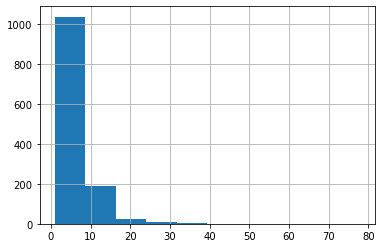

In [11]:
df['wage'].hist()


<Figure size 864x576 with 0 Axes>

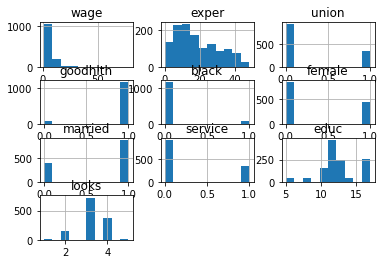

In [12]:
plt.figure(figsize=(12, 8))
df.hist();



In [13]:
df['female'].value_counts()

0    824
1    436
Name: female, dtype: int64

In [16]:
df['looks'].value_counts()


3    722
4    364
2    142
5     19
1     13
Name: looks, dtype: int64

In [21]:
df['goodhlth'].value_counts(normalize=True)

1    0.933333
0    0.066667
Name: goodhlth, dtype: float64

### Indexing

### .loc(~numpy arrays)

In [26]:
df.iloc[:6, 5:7]

,female,married
0,1,1
1,1,1
2,1,0
3,0,1
4,0,1
5,1,1


In [ ]:
toy_df = pd.DataFrame({'age':[17, 32, 56],
                      'salary':[56, 69, 120],
                      index=['Kate', 'Leo', 'Max']})

In [30]:
toy_df

,age,salary
Kate,17,56
Leo,32,69
Max,56,120


In [34]:
toy_df.iloc[2, 1]

120

In [37]:
## .loc

In [77]:
toy_df.loc[['Leo', 'Max'], 'age']

Leo    32
Max    56
Name: age, dtype: int64

### boolean indexing

In [44]:
df[(df['wage'] > 10) & (df['female'] == 1)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
18,10.44,10,0,1,0,1,0,0,17,4
85,10.12,40,0,1,1,1,0,1,10,3
149,10.62,18,1,1,0,1,1,1,17,3
152,12.12,35,1,0,0,1,0,1,17,3
184,10.22,26,0,1,0,1,0,1,17,3
334,10.53,18,0,1,0,1,1,1,16,3
546,10.12,18,0,1,0,1,0,1,13,3
602,77.72,9,1,1,1,1,1,1,13,4


### apply

In [46]:
def gender_id_to_str(gender_id):
    return 'female' if gender_id == 1 else 'male'


In [52]:
df['female'].apply(lambda x:
                   'female' if x == 1 else 'male').head()


0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

### map

In [53]:
df['female'].map({0:'male', 1: 'female'}).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

## GroupBy

In [54]:
df.loc[df['female'] == 1, 'wage'].median()


3.75

In [55]:
df.groupby('female')

In [60]:
for (gender_id, sub_df) in df.groupby('female'):
    print(gender_id)
    print(sub_df.shape)
    print('Median wages for {} are {}' .format('men' if gender_id == 0
                                              else 'women',
                                              sub_df['wage'].median()))

0
(824, 10)
Median wages for men are 6.41
1
(436, 10)
Median wages for women are 3.75


In [61]:
df.groupby('female')['wage'].median()

female
0    6.41
1    3.75
Name: wage, dtype: float64

In [63]:
df.groupby(['female', 'married'])['wage'].median()

female  married
0       0          5.065
        1          6.710
1       0          3.890
        1          3.580
Name: wage, dtype: float64

### crosstab

In [70]:
pd.crosstab(df['female'], df['married'])

married,0,1
female,,
0,166,658
1,223,213


In [73]:

import seaborn as sns

### wage/educ

In [74]:
df['educ'].value_counts()

12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: educ, dtype: int64

<AxesSubplot:xlabel='wage'>

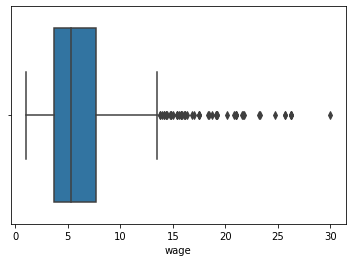

In [76]:
sns.boxplot(x='wage', data=df[df['wage'] < 30])

## Second lection

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/telecom_churn.csv')

In [3]:
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape


(3333, 20)

### Whole dataset visualizations

In [5]:
df["International plan"] = df["International plan"].map({'Yes':1, 'No': 0}) 
df["Voice mail plan"] = df["Voice mail plan"].map({'Yes':1, 'No': 0}) 

In [6]:

df['Churn'] = df['Churn'].astype('int')

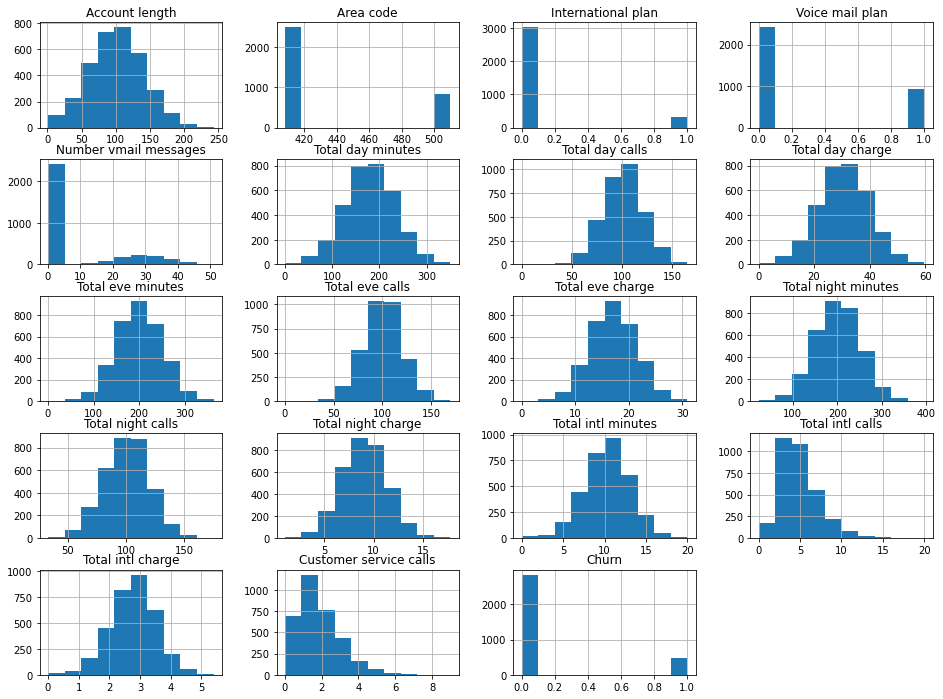

In [7]:
plt.rcParams['figure.figsize'] = (16, 12)
df.drop(['State'], axis=1).hist();

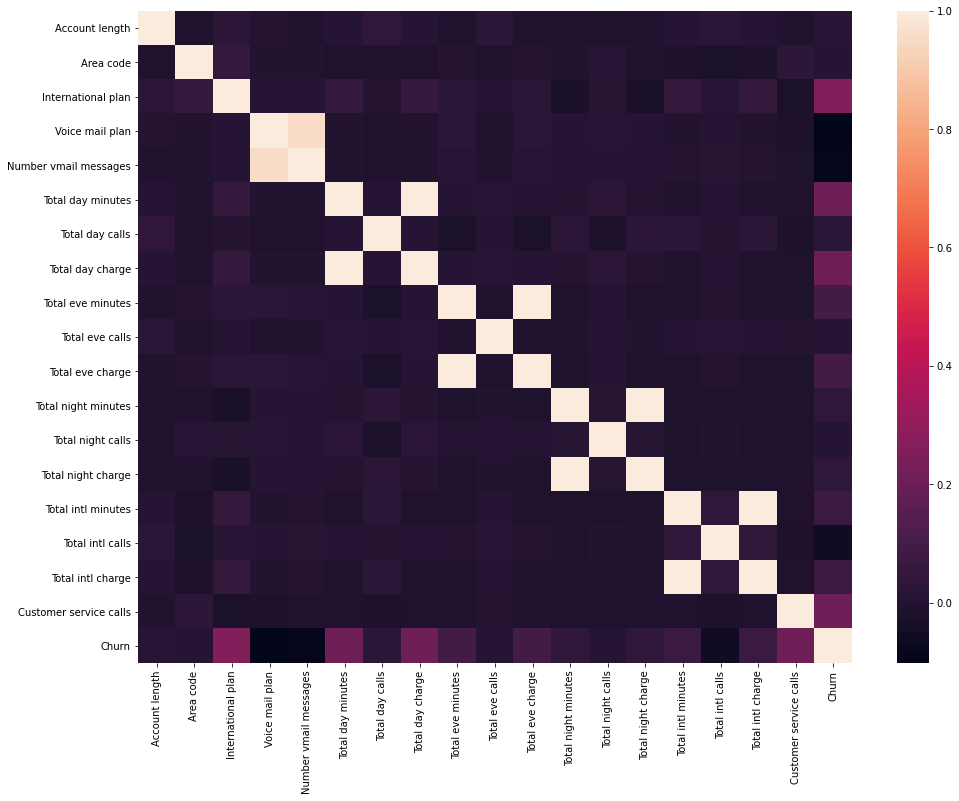

In [8]:
sns.heatmap(df.corr());

In [9]:
df.drop([feat_name for feat_name in df.columns if 'charge' in feat_name],axis = 1, inplace=True)

In [10]:
df.shape

(3333, 16)

In [11]:
from sklearn.manifold import TSNE

In [17]:
state = df['State']
df.drop('State', axis=1, inplace=True)





In [18]:
tsne = TSNE(random_state=17)

In [19]:
%%time
X_repr = tsne.fit_transform(df)

CPU times: user 2min 13s, sys: 2.21 s, total: 2min 16s
Wall time: 18.8 s


In [20]:
X_repr.shape

(3333, 2)

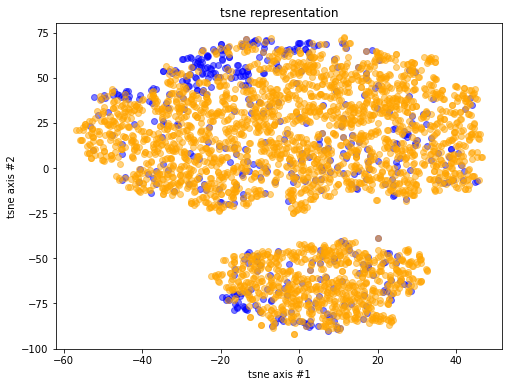

In [37]:
plt.rcParams['figure.figsize']=(8, 6)
plt.scatter(X_repr[df['Churn'] == 1, 0], X_repr[df['Churn'] == 1, 1], alpha=.5, c='blue', label='churn');
plt.scatter(X_repr[df['Churn'] == 0, 0], X_repr[df['Churn'] == 0, 1], alpha=.5, c='orange', label='loyal');
plt.xlabel('tsne axis #1')
plt.ylabel('tsne axis #2')
plt.title('tsne representation')
plt.savefig('churn_tsne.png', dpi=1000)


<img src='churn_tsne.png'>

#### t SNE - distrib stoch neighbor embettig

# Features one at a time

In [55]:
df['Total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

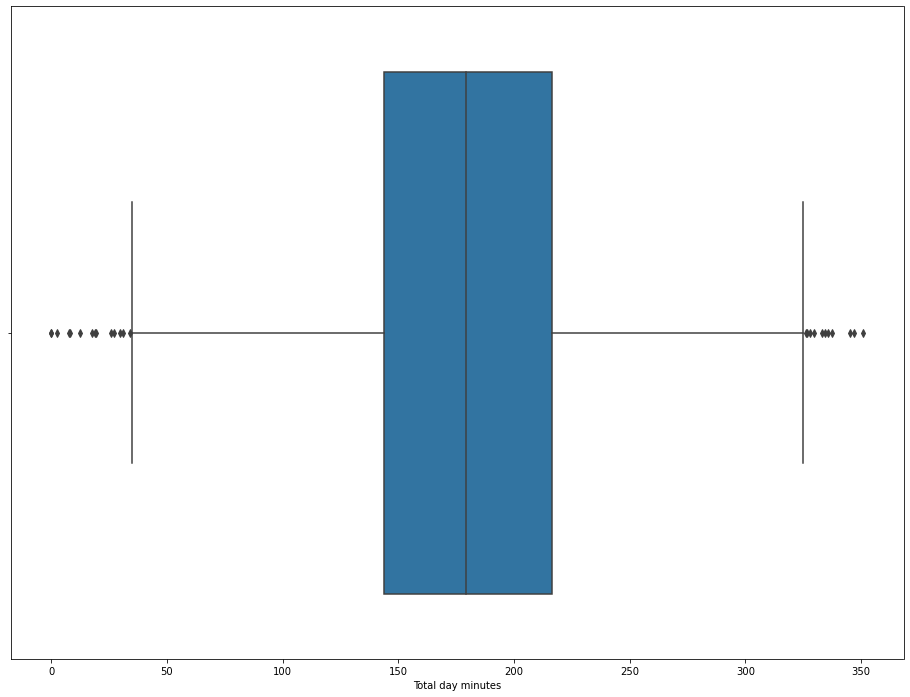

In [56]:
sns.boxplot(x='Total day minutes',data=df);

In [61]:
plt.rcParams['figure.figsize'] = (16,12 )

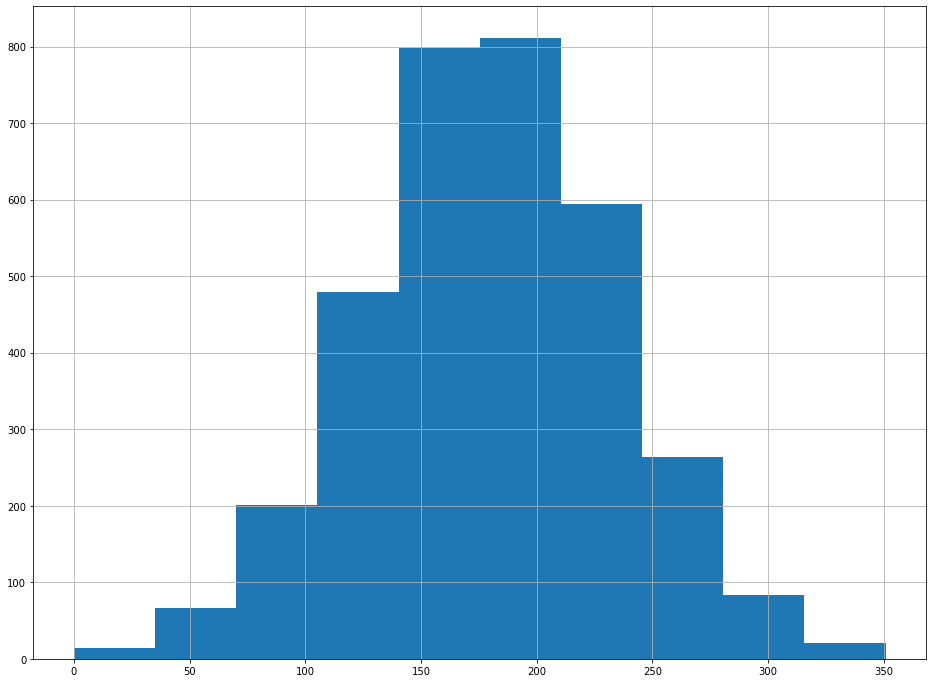

In [62]:
df['Total day minutes'].hist();

## Categorical

In [63]:
df['State'].nunique()

51

In [64]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [65]:
df['Churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

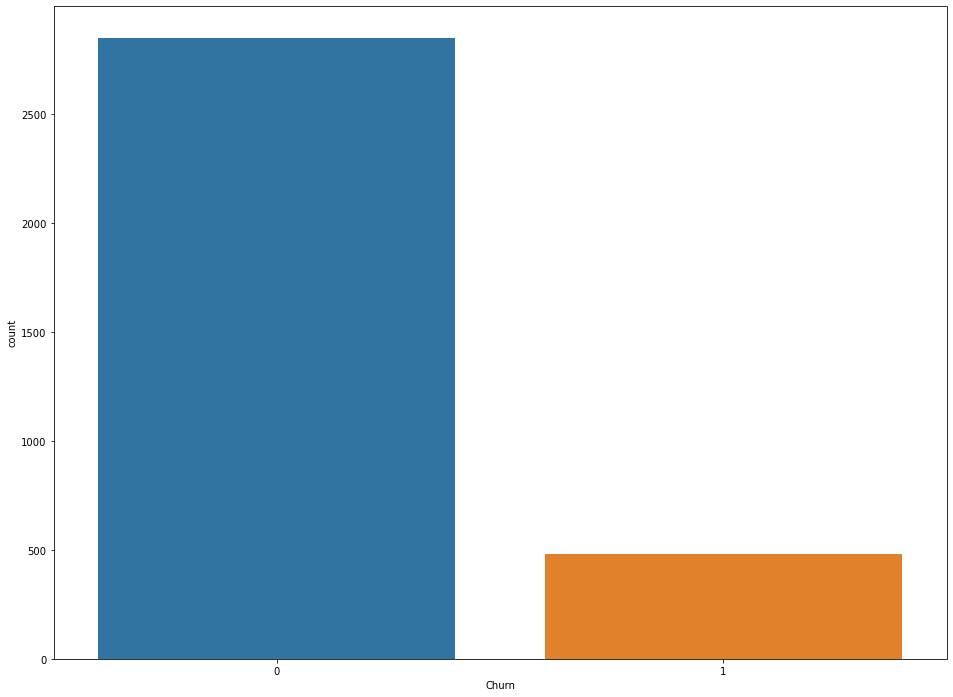

In [67]:
sns.countplot(x='Churn', data=df);

## Interaction between features
####Numeric-numeric

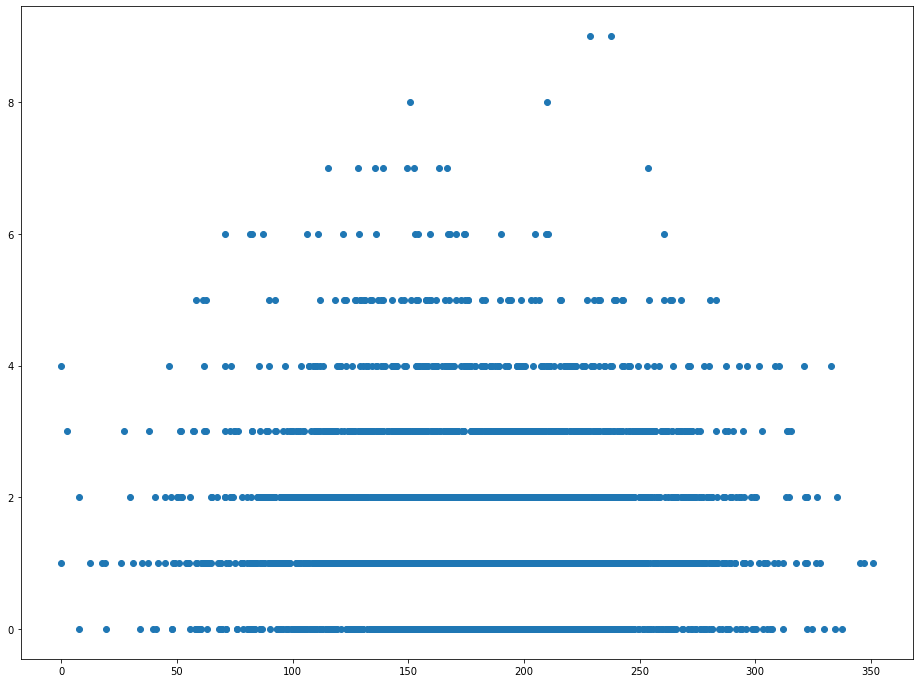

In [69]:
plt.scatter(df['Total day minutes'],
           df['Customer service calls']);


In [70]:
states = df['State']
df.drop('State', axis=1, inplace=True)

In [71]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [72]:
df.corrwith(df['Total day minutes'])

Account length            0.006216
Area code                -0.008264
International plan        0.049396
Voice mail plan          -0.001684
Number vmail messages     0.000778
Total day minutes         1.000000
Total day calls           0.006750
Total eve minutes         0.007043
Total eve calls           0.015769
Total night minutes       0.004323
Total night calls         0.022972
Total intl minutes       -0.010155
Total intl calls          0.008033
Customer service calls   -0.013423
Churn                     0.205151
dtype: float64

## Categorical-categorical

In [73]:
pd.crosstab(df['Churn'], df['Customer service calls'])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0
1,92,122,87,44,76,40,14,5,1,2


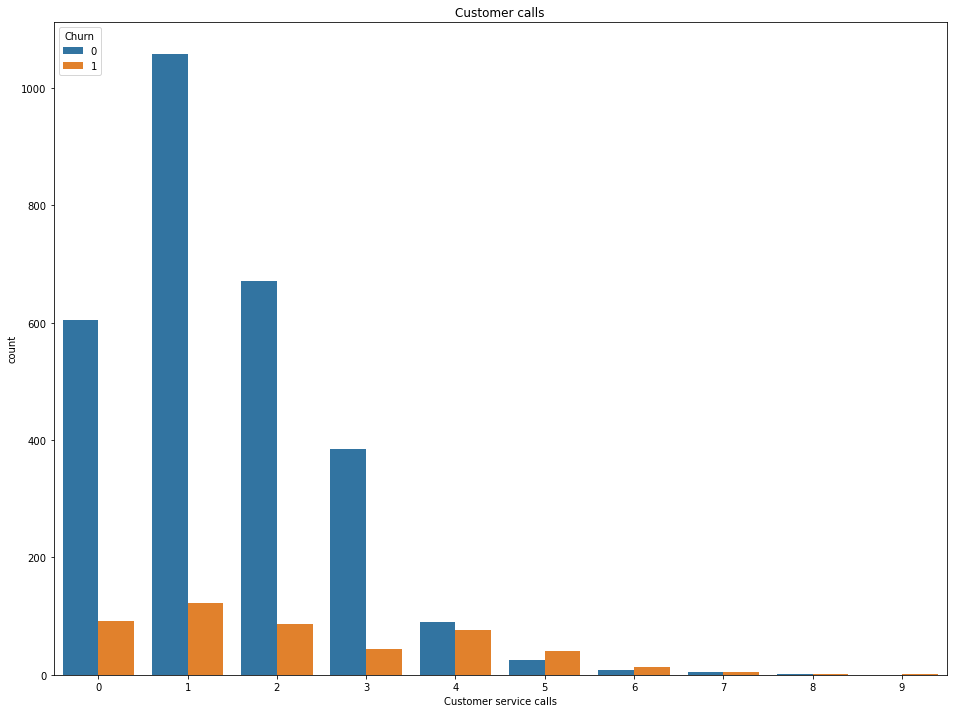

In [77]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);
plt.title('Customer calls');

## Categorical - numeric

In [43]:
import numpy as np
df.groupby('Churn')['Total day minutes', 'Customer service calls'].agg([np.median,
                                                                      np.std])

<ipython-input-43-fc90ab925ff3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Churn')['Total day minutes', 'Customer service calls'].agg([np.median,


Total day minutes            Customer service calls          
                 median        std                 median       std
Churn                                                              
0                 177.2  50.181655                      1  1.163883
1                 217.6  68.997792                      2  1.853275

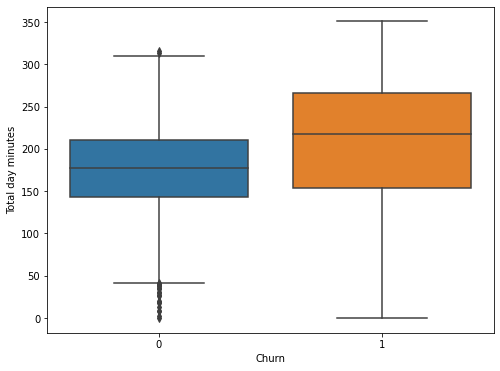

In [45]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);